In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Creating a model that helps convert kilometers to miles automatically</h2>

In [3]:
df = pd.read_csv("C:\\Users\moses\Downloads\ksdata.csv")

In [4]:
df.head()

,Kilometres,Miles
0,1,0.62
1,5,3.10
2,10,6.21
3,15,9.32
4,150,93.20


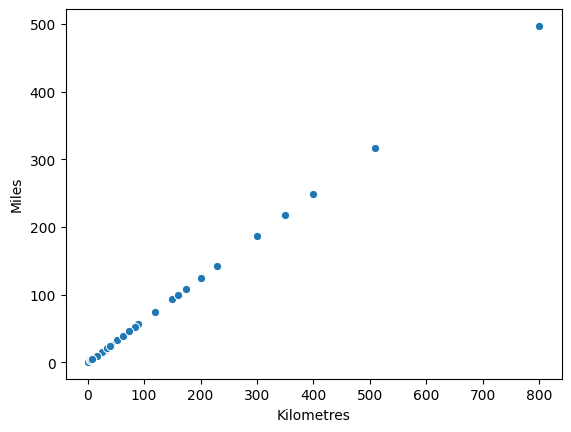

In [5]:
sns.scatterplot(df['Kilometres'], df['Miles'])
plt.show()

In [6]:
X_train = df['Kilometres']
y_train = df['Miles']

lets use keras.Sequential” method to create a neural network to which “layers” are added sequentially. Each layer has the function of gradually distill the input data to obtain the desired output.

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))
model.compile(optimizer=tf.keras.optimizers.Adam(1), loss='mean_squared_error')

<h2>Training the model</h2>

If the number of epochs is small, the error will be large and vice versa.
If the number of epochs is big, the execution of the algorithm will be slower.

In [9]:
epochs_hist = model.fit(X_train, y_train, epochs = 250)

Epoch 1/250
1/1 [==============================] - 7s 7s/step - loss: 216134.3438
Epoch 2/250
1/1 [==============================] - 0s 56ms/step - loss: 54485.3984
Epoch 3/250
1/1 [==============================] - 0s 40ms/step - loss: 308.4533
Epoch 4/250
1/1 [==============================] - 0s 40ms/step - loss: 23810.7598
Epoch 5/250
1/1 [==============================] - 0s 48ms/step - loss: 62962.0547
Epoch 6/250
1/1 [==============================] - 0s 55ms/step - loss: 73969.6641
Epoch 7/250
1/1 [==============================] - 0s 54ms/step - loss: 56821.2148
Epoch 8/250
1/1 [==============================] - 0s 64ms/step - loss: 29152.8574
Epoch 9/250
1/1 [==============================] - 0s 80ms/step - loss: 7317.7036
Epoch 10/250
1/1 [==============================] - 0s 96ms/step - loss: 11.2193
Epoch 11/250
1/1 [==============================] - 0s 48ms/step - loss: 6643.5479
Epoch 12/250
1/1 [==============================] - 0s 90ms/step - loss: 19295.5410
Epoch 13/

dict_keys(['loss'])


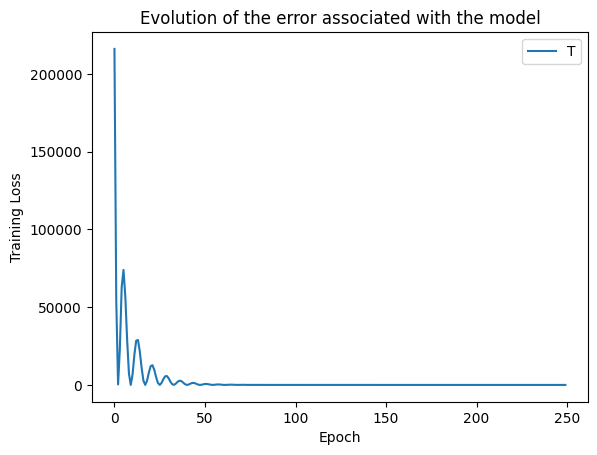

In [10]:
print(epochs_hist.history.keys())
	
#graph
plt.plot(epochs_hist.history['loss'])
plt.title('Evolution of the error associated with the model')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend('Training Loss')
plt.show()

<h2>Making predictions</h2>

In [11]:
kilometers = 100
predictedMiles = model.predict([kilometers])
print("The conversion from Kilometres to Miles is as follows: " + str(predictedMiles))

1/1 [==============================] - 4s 4s/step
The conversion from Kilometres to Miles is as follows: [[62.16736]]


In [12]:
milesByFormula = kilometers * 0.6214
print("The conversion from kilometers to miles using the mathematical formula is as follows:" + str(milesByFormula))
diference = milesByFormula - predictedMiles
print("Prediction error:" + str(diference))

The conversion from kilometers to miles using the mathematical formula is as follows:62.13999999999999
Prediction error:[[-0.02735901]]
